# Classic methods

## IMDB Dataset

In [ ]:
from fastai.text.all import *

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

(#1) [Path('/home/renato/.fastai/data/imdb_sample/texts.csv')]

In [ ]:
df = pd.read_csv(path/'texts.csv')
df.sample(3)

,label,text,is_valid
722,positive,"This is a really interesting movie. It is an action movie with comedy mixed in. Foxx teams up with comedian Epps in this movie to give it a comedic spin. It will keep you wondering whats going to happen to Foxx next. It was a well shot movie, the director used the right colors in this movie(dark blue colors) to give it the right kind of feel. Kimberly Elise also starred in this movie and it is always a pleasure to see her on the big screen. She plays her role well. Even Jamie Kennedy is in this movie. It's worth seeing it you haven't seen it. It's definitely worth having if you are a Jamie...",False
804,positive,"""In April 1946, the University of Chicago agreed to operate Argonne National Laboratory, with an association of Midwestern universities offering to sponsor the research. Argonne thereby became the first ""national"" laboratory. It did not, however, remain at its original location in the Argonne forest. In 1947, it moved farther west from the ""Windy City"" to a new site on Illinois farmland. When Alvin Weinberg visited Argonne's director, Walter Zinn, in 1947, he asked him what kind of reactor was to be built at the new site. When Zinn described a heavy-water reactor operating at one-tenth the...",True
816,negative,"About the baby: Why wasn't big brother assuming he'd be hungry for a bottle or some nourishment or a diaper change? He should have been screaming non-stop after that many hours without care. Definitely stupid to take the baby from a safe place when he didn't need to.<br /><br />And why was the road miraculously clear whenever anyone wanted to drive somewhere? Didn't any uprooted trees fall on the roads and block them?<br /><br />I can't imagine the cops at the roadblock not immediately following after any young person who would crash it, especially when they said it was dangerous to go the...",True


In [ ]:
df.is_valid.value_counts()

is_valid
False    800
True     200
Name: count, dtype: int64

In [ ]:
(df
 .groupby('is_valid', as_index=False)
 .label.value_counts()
 .assign(perc=lambda d: d['count']/d.groupby('is_valid')['count'].transform('sum'))
)

,is_valid,label,count,perc
0,False,negative,417,0.52125
1,False,positive,383,0.47875
2,True,negative,107,0.53500
3,True,positive,93,0.46500


## Preprocess data

### Split train/validation

In [ ]:
x_train = df.loc[~df.is_valid, 'text'].values
y_train = df.loc[~df.is_valid, 'label'].values
x_train.shape, y_train.shape

((800,), (800,))

In [ ]:
x_valid = df.loc[df.is_valid, 'text'].values
y_valid = df.loc[df.is_valid, 'label'].values
x_valid.shape, y_valid.shape

((200,), (200,))

In [ ]:
for i in np.random.choice(len(x_train), 3):
    print(f'[{i:3}]: {y_train[i]}')
    print(x_train[i])
    print('-'*80)

[116]: positive
Before she went into politics or public service, Glenda Jackson was one of Britain's finest film actresses. This film displays her talent despite having a supporting role in a stellar cast that includes Julie Christie as Kitty, the wife of a British Royal Captain who has lost his memory of the last 20 years, and Jenny played by American Ann-Margret in an almost unrecognizable role as the doting sister. Alan Bates plays the captain who suffers from memory loss triggered by the shell shock during World War I. Sir Ian Holm has a smaller role as the doctor treating him. You see familiar faces like Sheila Keith, Patsy Byrne, and Frank Finlay. You can't help but watch Glenda play a dowdy housewife and the first true love of the Captain but they came from different classes. It's not the greatest movie but it's good to see Glenda's amazing talent. She is still a fantastic actress, comedy or drama. She makes Margaret Grey into a likable character and you see why a regal captain 

### Vectorize

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df.text.head(5))
x

<5x490 sparse matrix of type '<class 'numpy.float64'>'
	with 664 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['about', 'across', 'acting', 'actors', 'actress', 'actually',
       'admiration', 'against', 'all', 'almost', 'along', 'already',
       'also', 'american', 'an', 'and', 'are', 'around', 'as', 'at',
       'awful', 'banzai', 'barrage', 'baseness', 'be', 'because', 'been',
       'before', 'begin', 'being', 'believable', 'believe', 'best',
       'better', 'between', 'big', 'bio', 'bit', 'black', 'blame',
       'blathered', 'bleeping', 'border', 'both', 'br', 'brassed',
       'british', 'but', 'by', 'came', 'camera', 'can', 'cannot',
       'career', 'caring', 'carries', 'case', 'cast', 'certainly',
       'challenges', 'change', 'character', 'characteristics', 'cheap',
       'cheery', 'chill', 'choice', 'clever', 'coleman', 'come', 'comes',
       'comforting', 'compelled', 'concentrate', 'concept', 'continually',
       'cost', 'could', 'countries', 'country', 'cruelly', 'cruelty',
       'dad', 'days', 'deal', 'declaration', 'deep', 'determine',
       'develop', 'developm

In [ ]:
x[0].toarray()

array([[0.        , 0.        , 0.10775324, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13355736, 0.        , 0.        , 0.07524389,
        0.        , 0.10775324, 0.        , 0.        , 0.        ,
        0.13355736, 0.13355736, 0.        , 0.        , 0.        ,
        0.13355736, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13355736, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10775324, 0.        ,
        0.        , 0.        , 0.        , 0.13355736, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.13355736, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')
vectorizer

TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')

In [ ]:
x_train_vec = vectorizer.fit_transform(x_train)
x_train_vec

<800x2977 sparse matrix of type '<class 'numpy.float64'>'
	with 52516 stored elements in Compressed Sparse Row format>

In [ ]:
x_valid_vec = vectorizer.transform(x_valid)
x_valid_vec

<200x2977 sparse matrix of type '<class 'numpy.float64'>'
	with 13059 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['000', '10', '100', ..., 'zombie', 'zombies', 'zone'], dtype=object)

In [ ]:
vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

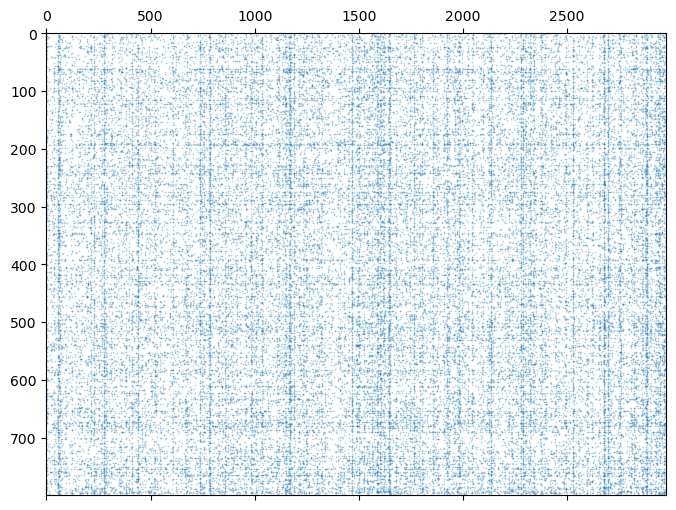

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
ax.spy(x_train_vec.toarray(), markersize=0.10, aspect='auto');

## Model

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(200, max_depth=7)
rf.fit(x_train_vec, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [ ]:
rf_preds = rf.predict(x_valid_vec)

In [ ]:
rf_accuracy = (rf_preds==y_valid).mean()
rf_accuracy

0.765

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_vec, y_train)

LogisticRegression()

In [ ]:
log_reg_preds = log_reg.predict(x_valid_vec)

In [ ]:
log_reg_accuracy = (log_reg_preds==y_valid).mean()
log_reg_accuracy

0.81

### Results

In [ ]:
df_results = pd.DataFrame({
    'text': x_valid,
    'label': y_valid,
    'rf_preds': rf_preds,
    'log_reg_preds': log_reg_preds,
})
df_results.sample(3)

,text,label,rf_preds,log_reg_preds
19,"Having enjoyed Jean Arthur in ""The Devil and Miss Jones"", my interest was peaked, so I tried sitting through this second-string screwball outing about an investigation into the death of a jockey--but I didn't make it to the end. Arthur, photographed in a gauzy, movie-magazine fashion, either wants alimony from ex-husband William Powell or another shot at marriage, but I never felt for her because the character is just a string of wisecracks (she's the type of heroine prone to comical curiousness, but once inside a morgue--like all women in these '30's comedies--she faints). William Powell ...",negative,positive,positive
36,"I'm not sure under what circumstances director Visconti decided to film James Cain's novel ""The Postman Always Rings Twice"" (I'm not even sure if Viscounti acquired the book's rights), but the resulting movie is definitely interesting. It is not the best version of Cain's story (I like the 1981 version best), but thanks to Visconti's excellent direction and the casting of Clara Calamai and Massimo Girotti (a very sensual couple), it is a must for noir fans. Visconti mixes neorealism with noir sensibilities to great effect. The film is not perfect, though. My main complaint is that the film...",positive,positive,positive
34,"Bonanza had a great cast of wonderful actors. Lorne Greene, Pernell Whitaker, Michael Landon, Dan Blocker, and even Guy Williams (as the cousin who was brought in for several episodes during 1964 to replace Adam when he was leaving the series). The cast had chemistry, and they seemed to genuinely like each other. That made many of their weakest stories work a lot better than they should have. It also made many of their best stories into great western drama.<br /><br />Like any show that was shooting over thirty episodes every season, there are bound to be some weak ones. However, most of t...",positive,positive,positive


In [ ]:
(df_results
 .loc[lambda d: (d.label!=d.rf_preds)&(d.label!=d.log_reg_preds)]
 .sample(3)
)

,text,label,rf_preds,log_reg_preds
27,"For a low budget project, the Film was a success. The story is interesting, and the actors were convincing. Eva Longoria, who now stars on the TV Show ""Dragnet,"" is sexier than ever. The locations were ideal for the ganster plot, and the director shows his talent by taking on many roles for his project. Of course this low budget film could use better editing transitions and more special effects for the gun scenes, but the music keeps this script moving. Although this film has it's share of problems, such as continuity, I must say that I would rent the director's next movie. If your a film ...",positive,negative,negative
149,"There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier's plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have ""clairvoyance"". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it's the languag...",positive,negative,negative
2,"This is, in my opinion, a very good film, especially for Michael Jackson lovers. It contains a message on drugs, stunning special effects, and an awesome music video.<br /><br />The main film is centered around the song and music video 'Smooth Criminal.' Unlike the four-minute music video, it is normal speed and, in my opinion, much easier to watch.<br /><br />The plot is rather weird, however. Michael Jackson plays a magical 'gangster' that, when he sees a shooting star, he transforms into a piece of machinery. Throughout the film, he transforms into a race car, a giant robot, and a space...",positive,negative,negative


## Bonus: NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=5)
nmf

NMF(n_components=5)

In [ ]:
x_train_nmf = nmf.fit_transform(x_train_vec, y_train)
x_train_nmf.shape

/home/renato/miniforge3/envs/nl/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(800, 5)

In [ ]:
nmf.components_.shape

(5, 2977)

In [ ]:
def top_words(row, topk=10):
    vocab = vectorizer.get_feature_names_out()
    return [vocab[o] for o in np.argsort(row)[-topk:][::-1]]

top_words(nmf.components_[0])

['life',
 'man',
 'time',
 'young',
 'family',
 'old',
 'john',
 'role',
 'father',
 'son']

In [ ]:
for o in nmf.components_:
    print(top_words(o))

['life', 'man', 'time', 'young', 'family', 'old', 'john', 'role', 'father', 'son']
['bad', 'acting', 'plot', 'effects', 'worst', 'don', 'terrible', 'seen', 've', 'make']
['just', 'really', 'good', 'didn', 'people', 'horror', 'watch', 'think', 'did', 'don']
['great', 'action', 'love', 'good', 'actors', 'story', 'bourne', 'characters', 'movies', 'films']
['series', 'episode', 'episodes', 'war', 'tv', 'best', 'fan', 'family', 'english', 'kids']


![NMF](pics/nmf.png)
(source: [NMF Tutorial](http://perso.telecom-paristech.fr/~essid/teach/NMF_tutorial_ICME-2014.pdf))

## Bonus: stemming

In [ ]:
import nltk
nltk.download('wordnet')
from nltk import stem

[nltk_data] Downloading package wordnet to /home/renato/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
porter = stem.porter.PorterStemmer()
[porter.stem(word) for word in ['organize', 'organizes', 'organizing']]

['organ', 'organ', 'organ']

## Bonus: lemmatization

In [ ]:
wnl = stem.WordNetLemmatizer()
[wnl.lemmatize(word) for word in ['organize', 'organizes', 'organizing']]

['organize', 'organizes', 'organizing']